## Exploratory Analysis using Pandas, Matplotlib, and Seaborn. 

In this notebook, we'll start munging some real data and exploring using various Pandas methods and data visualizations.  


Imports:
```python
import pandas as pd
import numpy as np
import os
```

In [1]:
import pandas as pd
import numpy as np
import os

Paths:
```python
dir = r'C:/Users/phwh9568/Workshops/Python_Data_Camp/'
data_dir = os.path.join(dir,'data')
```

In [2]:
dir = r'C:/Users/phwh9568/Workshops/Python_Data_Camp/'
data_dir = os.path.join(dir,'data')

Let's read in some data from from the EPA's [Environmental Justice Screening and Mapping Tool](https://www.epa.gov/ejscreen).  ```EJscreen_Colorado.csv``` is in the data directory. This is an extract of a nationwide dataset available here: https://www.epa.gov/ejscreen/download-ejscreen-data.  

We're working with data on the census tract level. You will also find a data dictionary in the data folder that explains the variables: ```EJScreen_2024_Tract_Percentiles_Columns.xlsx```

We'll use this data to make use of Pandas' data munging/manipulating/analyzing capabilities.  

Read it in as a variable:  
```python
data = pd.read_csv(os.path.join(data_dir,'EJscreen_Colorado.csv'))
```

In [157]:
data = pd.read_csv(os.path.join(data_dir,'EJScreen_Colorado.csv'),dtype={'ID':str})

In [161]:
data

ID STATE_NAME ST_ABBREV     CNTY_NAME  REGION  ACSTOTPOP  \
0     08001007801   Colorado        CO  Adams County       8       3889   
1     08001007802   Colorado        CO  Adams County       8       4359   
2     08001007900   Colorado        CO  Adams County       8       6126   
3     08001008000   Colorado        CO  Adams County       8       5763   
4     08001008100   Colorado        CO  Adams County       8       1674   
...           ...        ...       ...           ...     ...        ...   
1442  08123002300   Colorado        CO   Weld County       8       5470   
1443  08123002501   Colorado        CO   Weld County       8       5794   
1444  08123002502   Colorado        CO   Weld County       8       7452   
1445  08125963100   Colorado        CO   Yuma County       8       4370   
1446  08125963200   Colorado        CO   Yuma County       8       5568   

      ACSIPOVBAS  ACSEDUCBAS  ACSTOTHH  ACSTOTHU  ...         PTRAF  PRE1960  \
0           3850        2338      1288      1403  ...  3.083834e+06    460.0   
1           4349        2597      1528      1616  ...  2.799872e+06    571.0   
2           6126        3794      2222      2300  ...  2.896340e+06   1196.0   
3           5738        3806      1922      2138  ...  2.612349e+06   1295.0   
4           1477        1305       806       922  ...  2.686544e+06      0.0   
...          ...         ...       ...       ...  ...           ...      ...   
1442        5432        3940      2168      2233  ...  9.245676e+04    496.0   
1443        5792        4006      1918      2091  ...  2.169755e+04    685.0   
1444        7433        4901      2443      2525  ...  7.159599e+04    602.0   
1445        4274        2948      1710      1920  ...  4.938223e+04    834.0   
1446        5378        3718      2243      2393  ...  2.708546e+04   1123.0   

      PRE1960PCT      PNPL      PRMP     PTSDF        UST         PWDIS  \
0       0.327869  0.669703  1.877369  2.073401  18.367974   6998.315640   
1       0.353342  0.559196  1.580352  2.447664  27.299876   8375.140546   
2       0.520000  0.692192  2.094691  2.061385  10.328617   8800.094864   
3       0.605706  0.605078  1.888196  2.437295   6.845090  12517.926928   
4       0.000000  0.532365  1.639807  3.899799   8.233914  18395.649889   
...          ...       ...       ...       ...        ...           ...   
1442    0.222123  0.000000  0.268646  0.086550   0.106629    607.498975   
1443    0.327594  0.000000  0.330974  0.000000   0.000786    176.948736   
1444    0.238416  0.000000  1.014882  0.159845   0.080032    116.308356   
1445    0.434375  0.000000  0.665121  0.000000   0.175116      8.536003   
1446    0.469285  0.000000  0.214805  0.000000   0.201496      0.006666   

           NO2     DWATER  
0     7.074942   0.000000  
1     7.646279   0.000000  
2     7.263358   0.000000  
3     7.596739   0.000000  
4     8.273159   0.000000  
...        ...        ...  
1442  6.137583   0.370718  
1443  3.556240   0.000000  
1444  6.791139   0.306212  
1445  5.288863   2.906679  
1446  6.676397  39.566919  

[1447 rows x 45 columns]

Quick note on field data types... Pandas will guess/assume column data types, and usually this is fine. But not always!  

You can explicitly declare a column data type on read using the ```dtype``` parameter of ```.read_csv()```.  

This is me telling you there is a messed up column here. Reimport setting ID to string.

In [162]:
data

ID STATE_NAME ST_ABBREV     CNTY_NAME  REGION  ACSTOTPOP  \
0     08001007801   Colorado        CO  Adams County       8       3889   
1     08001007802   Colorado        CO  Adams County       8       4359   
2     08001007900   Colorado        CO  Adams County       8       6126   
3     08001008000   Colorado        CO  Adams County       8       5763   
4     08001008100   Colorado        CO  Adams County       8       1674   
...           ...        ...       ...           ...     ...        ...   
1442  08123002300   Colorado        CO   Weld County       8       5470   
1443  08123002501   Colorado        CO   Weld County       8       5794   
1444  08123002502   Colorado        CO   Weld County       8       7452   
1445  08125963100   Colorado        CO   Yuma County       8       4370   
1446  08125963200   Colorado        CO   Yuma County       8       5568   

      ACSIPOVBAS  ACSEDUCBAS  ACSTOTHH  ACSTOTHU  ...         PTRAF  PRE1960  \
0           3850        2338      1288      1403  ...  3.083834e+06    460.0   
1           4349        2597      1528      1616  ...  2.799872e+06    571.0   
2           6126        3794      2222      2300  ...  2.896340e+06   1196.0   
3           5738        3806      1922      2138  ...  2.612349e+06   1295.0   
4           1477        1305       806       922  ...  2.686544e+06      0.0   
...          ...         ...       ...       ...  ...           ...      ...   
1442        5432        3940      2168      2233  ...  9.245676e+04    496.0   
1443        5792        4006      1918      2091  ...  2.169755e+04    685.0   
1444        7433        4901      2443      2525  ...  7.159599e+04    602.0   
1445        4274        2948      1710      1920  ...  4.938223e+04    834.0   
1446        5378        3718      2243      2393  ...  2.708546e+04   1123.0   

      PRE1960PCT      PNPL      PRMP     PTSDF        UST         PWDIS  \
0       0.327869  0.669703  1.877369  2.073401  18.367974   6998.315640   
1       0.353342  0.559196  1.580352  2.447664  27.299876   8375.140546   
2       0.520000  0.692192  2.094691  2.061385  10.328617   8800.094864   
3       0.605706  0.605078  1.888196  2.437295   6.845090  12517.926928   
4       0.000000  0.532365  1.639807  3.899799   8.233914  18395.649889   
...          ...       ...       ...       ...        ...           ...   
1442    0.222123  0.000000  0.268646  0.086550   0.106629    607.498975   
1443    0.327594  0.000000  0.330974  0.000000   0.000786    176.948736   
1444    0.238416  0.000000  1.014882  0.159845   0.080032    116.308356   
1445    0.434375  0.000000  0.665121  0.000000   0.175116      8.536003   
1446    0.469285  0.000000  0.214805  0.000000   0.201496      0.006666   

           NO2     DWATER  
0     7.074942   0.000000  
1     7.646279   0.000000  
2     7.263358   0.000000  
3     7.596739   0.000000  
4     8.273159   0.000000  
...        ...        ...  
1442  6.137583   0.370718  
1443  3.556240   0.000000  
1444  6.791139   0.306212  
1445  5.288863   2.906679  
1446  6.676397  39.566919  

[1447 rows x 45 columns]

It's too big to view the whole thing, but we can use various methods to get a feel for the data set...  

Let's explore:  

```python
data.head()
data.tail()
data.columns
data.describe
```

In [33]:
data.head()

ID STATE_NAME ST_ABBREV     CNTY_NAME  REGION  ACSTOTPOP  \
0  08001007801   Colorado        CO  Adams County       8       3889   
1  08001007802   Colorado        CO  Adams County       8       4359   
2  08001007900   Colorado        CO  Adams County       8       6126   
3  08001008000   Colorado        CO  Adams County       8       5763   
4  08001008100   Colorado        CO  Adams County       8       1674   

   ACSIPOVBAS  ACSEDUCBAS  ACSTOTHH  ACSTOTHU  ...         PTRAF  PRE1960  \
0        3850        2338      1288      1403  ...  3.083834e+06    460.0   
1        4349        2597      1528      1616  ...  2.799872e+06    571.0   
2        6126        3794      2222      2300  ...  2.896340e+06   1196.0   
3        5738        3806      1922      2138  ...  2.612349e+06   1295.0   
4        1477        1305       806       922  ...  2.686544e+06      0.0   

   PRE1960PCT      PNPL      PRMP     PTSDF        UST         PWDIS  \
0    0.327869  0.669703  1.877369  2.073401  18.367974   6998.315640   
1    0.353342  0.559196  1.580352  2.447664  27.299876   8375.140546   
2    0.520000  0.692192  2.094691  2.061385  10.328617   8800.094864   
3    0.605706  0.605078  1.888196  2.437295   6.845090  12517.926928   
4    0.000000  0.532365  1.639807  3.899799   8.233914  18395.649889   

        NO2  DWATER  
0  7.074942     0.0  
1  7.646279     0.0  
2  7.263358     0.0  
3  7.596739     0.0  
4  8.273159     0.0  

[5 rows x 45 columns]

```python
data.columns
```

In [159]:
data.columns

Index(['ID', 'STATE_NAME', 'ST_ABBREV', 'CNTY_NAME', 'REGION', 'ACSTOTPOP',
       'ACSIPOVBAS', 'ACSEDUCBAS', 'ACSTOTHH', 'ACSTOTHU', 'ACSUNEMPBAS',
       'ACSDISABBAS', 'DEMOGIDX_2', 'DEMOGIDX_5', 'PEOPCOLOR', 'PEOPCOLORPCT',
       'LOWINCOME', 'LOWINCPCT', 'UNEMPLOYED', 'UNEMPPCT', 'DISABILITY',
       'DISABILITYPCT', 'LINGISO', 'LINGISOPCT', 'LESSHS', 'LESSHSPCT',
       'UNDER5', 'UNDER5PCT', 'OVER64', 'OVER64PCT', 'LIFEEXPPCT', 'PM25',
       'OZONE', 'DSLPM', 'RSEI_AIR', 'PTRAF', 'PRE1960', 'PRE1960PCT', 'PNPL',
       'PRMP', 'PTSDF', 'UST', 'PWDIS', 'NO2', 'DWATER'],
      dtype='object')

There's a fair amount of data we don't need right now, so let's split off the demographic information we're interested in along with the environmental variables.  

Let's make a list of the columns we want:
```python
environmental = list(data.columns[-14:])
```

In [160]:
environmental = list(data.columns[-14:])
environmental

['PM25',
 'OZONE',
 'DSLPM',
 'RSEI_AIR',
 'PTRAF',
 'PRE1960',
 'PRE1960PCT',
 'PNPL',
 'PRMP',
 'PTSDF',
 'UST',
 'PWDIS',
 'NO2',
 'DWATER']

And, we'll manually create a list of the demographic variables we want to include:  
```python
demographics = ['ID','PEOPCOLORPCT', 'LOWINCPCT', 'LIFEEXPPCT', 'LINGISOPCT', 'DISABILITYPCT']
```

In [149]:
demographics = ['ID','PEOPCOLORPCT', 'LOWINCPCT', 'LIFEEXPPCT', 'LINGISOPCT', 'DISABILITYPCT']

In [28]:
demographics

['ID',
 'PEOPCOLORPCT',
 'LOWINCPCT',
 'LIFEEXPPCT',
 'LINGISOPCT',
 'DISABILITYPCT']

Now, combine these two lists then use this list of columns to split off a new dataframe based on the selected columns... 

How do we do this?  

In [150]:
ejdata = data[demographics + environmental].copy()

Let's join another dataset to the ejscreen data that will tell us if an area is urban or rural.  

```python
urban = pd.read_csv(os.path.join(data_dir,'Colorado_Tracts_Urban.csv'), dtype={'GEOID':str})
```

In [200]:
urban = pd.read_csv(os.path.join(data_dir, 'Colorado_Tracts_Urban.csv'), dtype={'GEOID':str})

In [201]:
urban

STATEFP  COUNTYFP  TRACTCE        GEOID     NAME              NAMELSAD  \
0           8        27   970102  08027970102  9701.02  Census Tract 9701.02   
1           8        27   970101  08027970101  9701.01  Census Tract 9701.01   
2           8         1     8533  08001008533    85.33    Census Tract 85.33   
3           8         1     8534  08001008534    85.34    Census Tract 85.34   
4           8         1     8802  08001008802    88.02    Census Tract 88.02   
...       ...       ...      ...          ...      ...                   ...   
1442        8        35    14116  08035014116   141.16   Census Tract 141.16   
1443        8        35    14123  08035014123   141.23   Census Tract 141.23   
1444        8        35    13905  08035013905   139.05   Census Tract 139.05   
1445        8        41     6501  08041006501    65.01    Census Tract 65.01   
1446        8        41     2300  08041002300    23.00       Census Tract 23   

      MTFCC FUNCSTAT       ALAND   AWATER   INTPTLAT    INTPTLON UATYPE20  
0     G5020        S   871112279   455018  38.054321 -105.239722      NaN  
1     G5020        S  1041919696  2909132  38.094958 -105.500103      NaN  
2     G5020        S     3353029    36543  39.892202 -104.953815        U  
3     G5020        S     2341349    28063  39.893732 -104.931796        U  
4     G5020        S    12056169  3131932  39.852058 -104.912748        U  
...     ...      ...         ...      ...        ...         ...      ...  
1442  G5020        S     3976441        0  39.549663 -104.877263        U  
1443  G5020        S     5624145        0  39.424533 -104.881694        U  
1444  G5020        S     3645627        0  39.513159 -104.756615        U  
1445  G5020        S     1600530        0  38.800838 -104.737459        U  
1446  G5020        S     3129892        0  38.827361 -104.826333        U  

[1447 rows x 13 columns]

Check values of the ```UATYPE20``` column using ```.unique()```

In [204]:
urban['UATYPE20'].unique()

array(['R', 'U'], dtype=object)

Now, replace NaN values in ```UATYPE20``` to 'R' for rural. Do you remember how?

In [202]:
urban.fillna({'UATYPE20':'R'}, inplace=True)

In [203]:
urban

STATEFP  COUNTYFP  TRACTCE        GEOID     NAME              NAMELSAD  \
0           8        27   970102  08027970102  9701.02  Census Tract 9701.02   
1           8        27   970101  08027970101  9701.01  Census Tract 9701.01   
2           8         1     8533  08001008533    85.33    Census Tract 85.33   
3           8         1     8534  08001008534    85.34    Census Tract 85.34   
4           8         1     8802  08001008802    88.02    Census Tract 88.02   
...       ...       ...      ...          ...      ...                   ...   
1442        8        35    14116  08035014116   141.16   Census Tract 141.16   
1443        8        35    14123  08035014123   141.23   Census Tract 141.23   
1444        8        35    13905  08035013905   139.05   Census Tract 139.05   
1445        8        41     6501  08041006501    65.01    Census Tract 65.01   
1446        8        41     2300  08041002300    23.00       Census Tract 23   

      MTFCC FUNCSTAT       ALAND   AWATER   INTPTLAT    INTPTLON UATYPE20  
0     G5020        S   871112279   455018  38.054321 -105.239722        R  
1     G5020        S  1041919696  2909132  38.094958 -105.500103        R  
2     G5020        S     3353029    36543  39.892202 -104.953815        U  
3     G5020        S     2341349    28063  39.893732 -104.931796        U  
4     G5020        S    12056169  3131932  39.852058 -104.912748        U  
...     ...      ...         ...      ...        ...         ...      ...  
1442  G5020        S     3976441        0  39.549663 -104.877263        U  
1443  G5020        S     5624145        0  39.424533 -104.881694        U  
1444  G5020        S     3645627        0  39.513159 -104.756615        U  
1445  G5020        S     1600530        0  38.800838 -104.737459        U  
1446  G5020        S     3129892        0  38.827361 -104.826333        U  

[1447 rows x 13 columns]

Now merge:  
```python
ejdata = ejdata.merge(urban, left_on='ID', right_on='GEOID')
```

In [198]:
ejdata = ejdata.merge(urban[['GEOID','UATYPE20']], left_on='ID', right_on='GEOID')

Great! Now, export this data to a csv:  

```python
ejdata.to_csv(os.path.join(data_dir,'ejdata_urban.csv'))
```

In [199]:
ejdata.to_csv(os.path.join(data_dir,'ejdata_urban.csv'))

Let's explore this data some. **MAYBE** we can find some relationships?  

Start by using sort values to see census tracts with high ozone levels. 
```python
ejdata.sort_values(by=['OZONE'], ascending=False, inplace=True)
```

In [170]:
ejdata.sort_values(by=['LIFEEXPPCT'], ascending=False, inplace=True)

In [171]:
ejdata

ID  PEOPCOLORPCT  LOWINCPCT  LIFEEXPPCT  LINGISOPCT  \
969   08059011401      0.441455   0.325876    0.309744    0.101921   
75    08001009319      0.643262   0.519858    0.305641    0.127451   
1284  08101002600      0.506517   0.694763    0.303590    0.040323   
1076  08069000802      0.236251   0.352494    0.294359    0.021401   
1263  08101000600      0.613076   0.539657    0.294359    0.004802   
...           ...           ...        ...         ...         ...   
1423  08123002017      0.103395   0.041667         NaN    0.000000   
1427  08123002021      0.075912   0.110949         NaN    0.000000   
1435  08123002204      0.055610   0.115610         NaN    0.000000   
1439  08123002208      0.190395   0.099389         NaN    0.011480   
1441  08123002210      0.046149   0.035193         NaN    0.000000   

      DISABILITYPCT      PM25     OZONE     DSLPM      RSEI_AIR         PTRAF  \
969        0.144787  8.590671  77.46888  0.349507  10798.031244  4.052275e+06   
75         0.170213  9.369044  76.84047  0.390803   4865.939296  2.772040e+06   
1284       0.199664  5.939982  69.18587  0.132489   6830.114659  8.323422e+05   
1076       0.083983  7.926807  68.87841  0.181237      9.877347  1.193024e+06   
1263       0.217042  6.063779  69.22637  0.123007   3628.054999  1.354583e+06   
...             ...       ...       ...       ...           ...           ...   
1423       0.061728  9.761694  73.85465  0.278583   1572.519479  4.264607e+05   
1427       0.054332  9.901592  73.34243  0.174785   1294.459181  1.665712e+05   
1435       0.126829  9.026354  69.63085  0.191751     68.377096  2.637855e+05   
1439       0.081273  8.382512  68.75172  0.117671     57.105426  1.815482e+05   
1441       0.046149  9.161547  70.05304  0.206830     39.738557  3.036876e+05   

      PRE1960  PRE1960PCT      PNPL      PRMP     PTSDF        UST  \
969     404.0    0.331148  0.536284  0.313505  2.612202   9.378742   
75       46.0    0.045054  0.649075  0.698815  1.307523  17.556667   
1284    480.0    0.299439  0.507024  0.475619  0.573916   5.611099   
1076     28.0    0.054475  0.000000  0.365951  2.878819   2.990898   
1263    791.0    0.765731  0.442512  0.992436  0.522496   7.311510   
...       ...         ...       ...       ...       ...        ...   
1423      0.0    0.000000  0.000000  0.889166  1.167315   0.000000   
1427     20.0    0.076336  0.000000  0.694326  1.303657   0.000000   
1435     15.0    0.016988  0.000000  0.578050  3.101934   0.899461   
1439    251.0    0.064031  0.000000  0.445016  0.985587   0.050578   
1441      7.0    0.006856  0.000000  0.342369  1.325215   0.000000   

             PWDIS        NO2    DWATER  
969    1084.319116   8.555373  0.094624  
75     4865.903218   9.135113  0.000000  
1284  22474.525460   8.455957  0.000000  
1076   4308.660489  12.074300  0.000000  
1263  16000.047701   9.630618  0.000000  
...            ...        ...       ...  
1423    455.200607   7.245087  1.000000  
1427   1948.832866   5.869461  0.000000  
1435  16424.483596   7.275004  0.000000  
1439  13515.802825   6.096531  0.000000  
1441  12493.865811   6.864555  0.000000  

[1447 rows x 20 columns]

You might find it useful to add some color to your table... 
```python
ejdata[['LIFEEXPPCT','OZONE', 'PTRAF', 'PM25']].style.background_gradient()
```

In [ ]:
ejdata[['LIFEEXPPCT','OZONE', 'PTRAF', 'PM25']].style.background_gradient()

Here's some more info on styling Pandas tables: https://pandas.pydata.org/docs/user_guide/style.html

### Let's get into visualization.  

There's a TON of Python data visualization packages. We'll touch on three big ones:  
1. matplotlib
2. seaborn
3. plotly  

We'll start with matplotlib:

```python
import matplotlib.pyplot as plt
```

In [3]:
import matplotlib.pyplot as plt

Let's start by generating some scatterplots.  

We'll start with the standard matplotlib approach:  

Here are the docs: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html. 

```python
fig, ax = plt.subplots()

x = ejdata['LIFEEXPPCT']
y = ejdata['PTRAF']

ax.scatter(x,y)
```

Check the docs and modify... Change the figure size, marker color, marker size, set axis labels. 

Text(0, 0.5, '% Low Life Expectancy')

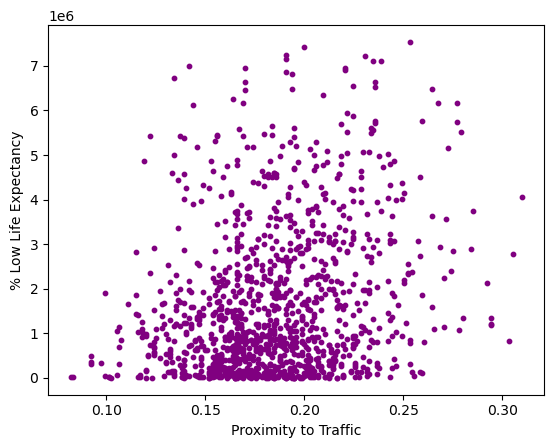

In [180]:
fig, ax = plt.subplots()

x = ejdata['LIFEEXPPCT']
y = ejdata['PTRAF']

ax.scatter(x,y, c='purple', s=10)
ax.set_xlabel('Proximity to Traffic')
ax.set_ylabel('% Low Life Expectancy')

Pandas X matplotlib...  

Pandas does have some built in matplotlib functionality.  For example, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html. 

```python
ejdata.plot.scatter(x='LIFEEXPPCT',y='PTRAF')
```

<Axes: xlabel='Perc Low Life Expectancy', ylabel='Proximity to Traffic'>

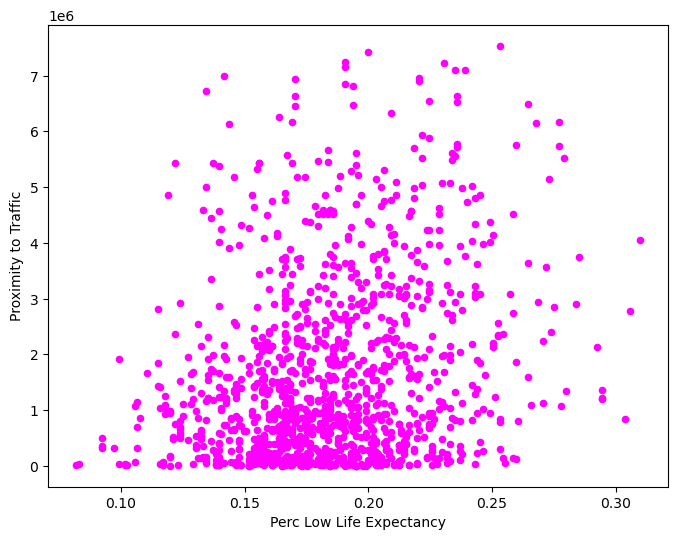

In [181]:
ejdata.plot.scatter(x='LIFEEXPPCT',
                    y='PTRAF', 
                    xlabel='Perc Low Life Expectancy', 
                    ylabel='Proximity to Traffic', 
                    c = 'magenta',
                    figsize=(8,6))

Definitely easier! But sometimes not as fully customizable.  

Although matplotlib is (maybe?) the standard bearer, there are several other very good visualization libraries that can be used as alternatives or alongside matplotlib.  

### Let's checkout [Seaborn](https://seaborn.pydata.org/)  

```python
import seaborn as sns
```

In [4]:
import seaborn as sns

Let's start again with our scatterplot.  

```python
sns.scatterplot(x=ejdata['LIFEEXPPCT'], Y=EJDATA['PTRAF'])
```

<Axes: xlabel='LIFEEXPPCT', ylabel='PTRAF'>

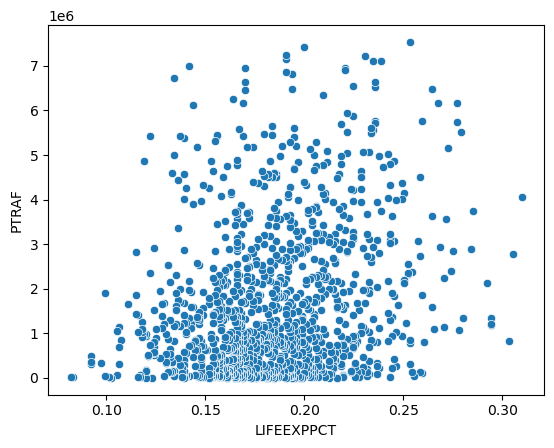

In [183]:
sns.scatterplot(x=ejdata['LIFEEXPPCT'], y=ejdata['PTRAF'])

Check the docs: 
Now, recreate the above plot but use the ```hue``` parameter to style it according to urban and rural areas:

Is there something here? Worth exploring? Maybe...  

Let's split off just the urban census tracts. Do you remember how to use ```.loc```?

In [60]:
ejUrban = ejdata.loc[ejdata['UATYPE20']=='U'].copy()

I guess we could keep futzing about plugging in various variables into our scatterplots...  

But why not produce them all at once? 

Let's check out Pairgrid:
```python
g = sns.PairGrid(ejUrban) #or sns.pairplot(ejUrban)
g.map(sns.scatterplot)
```

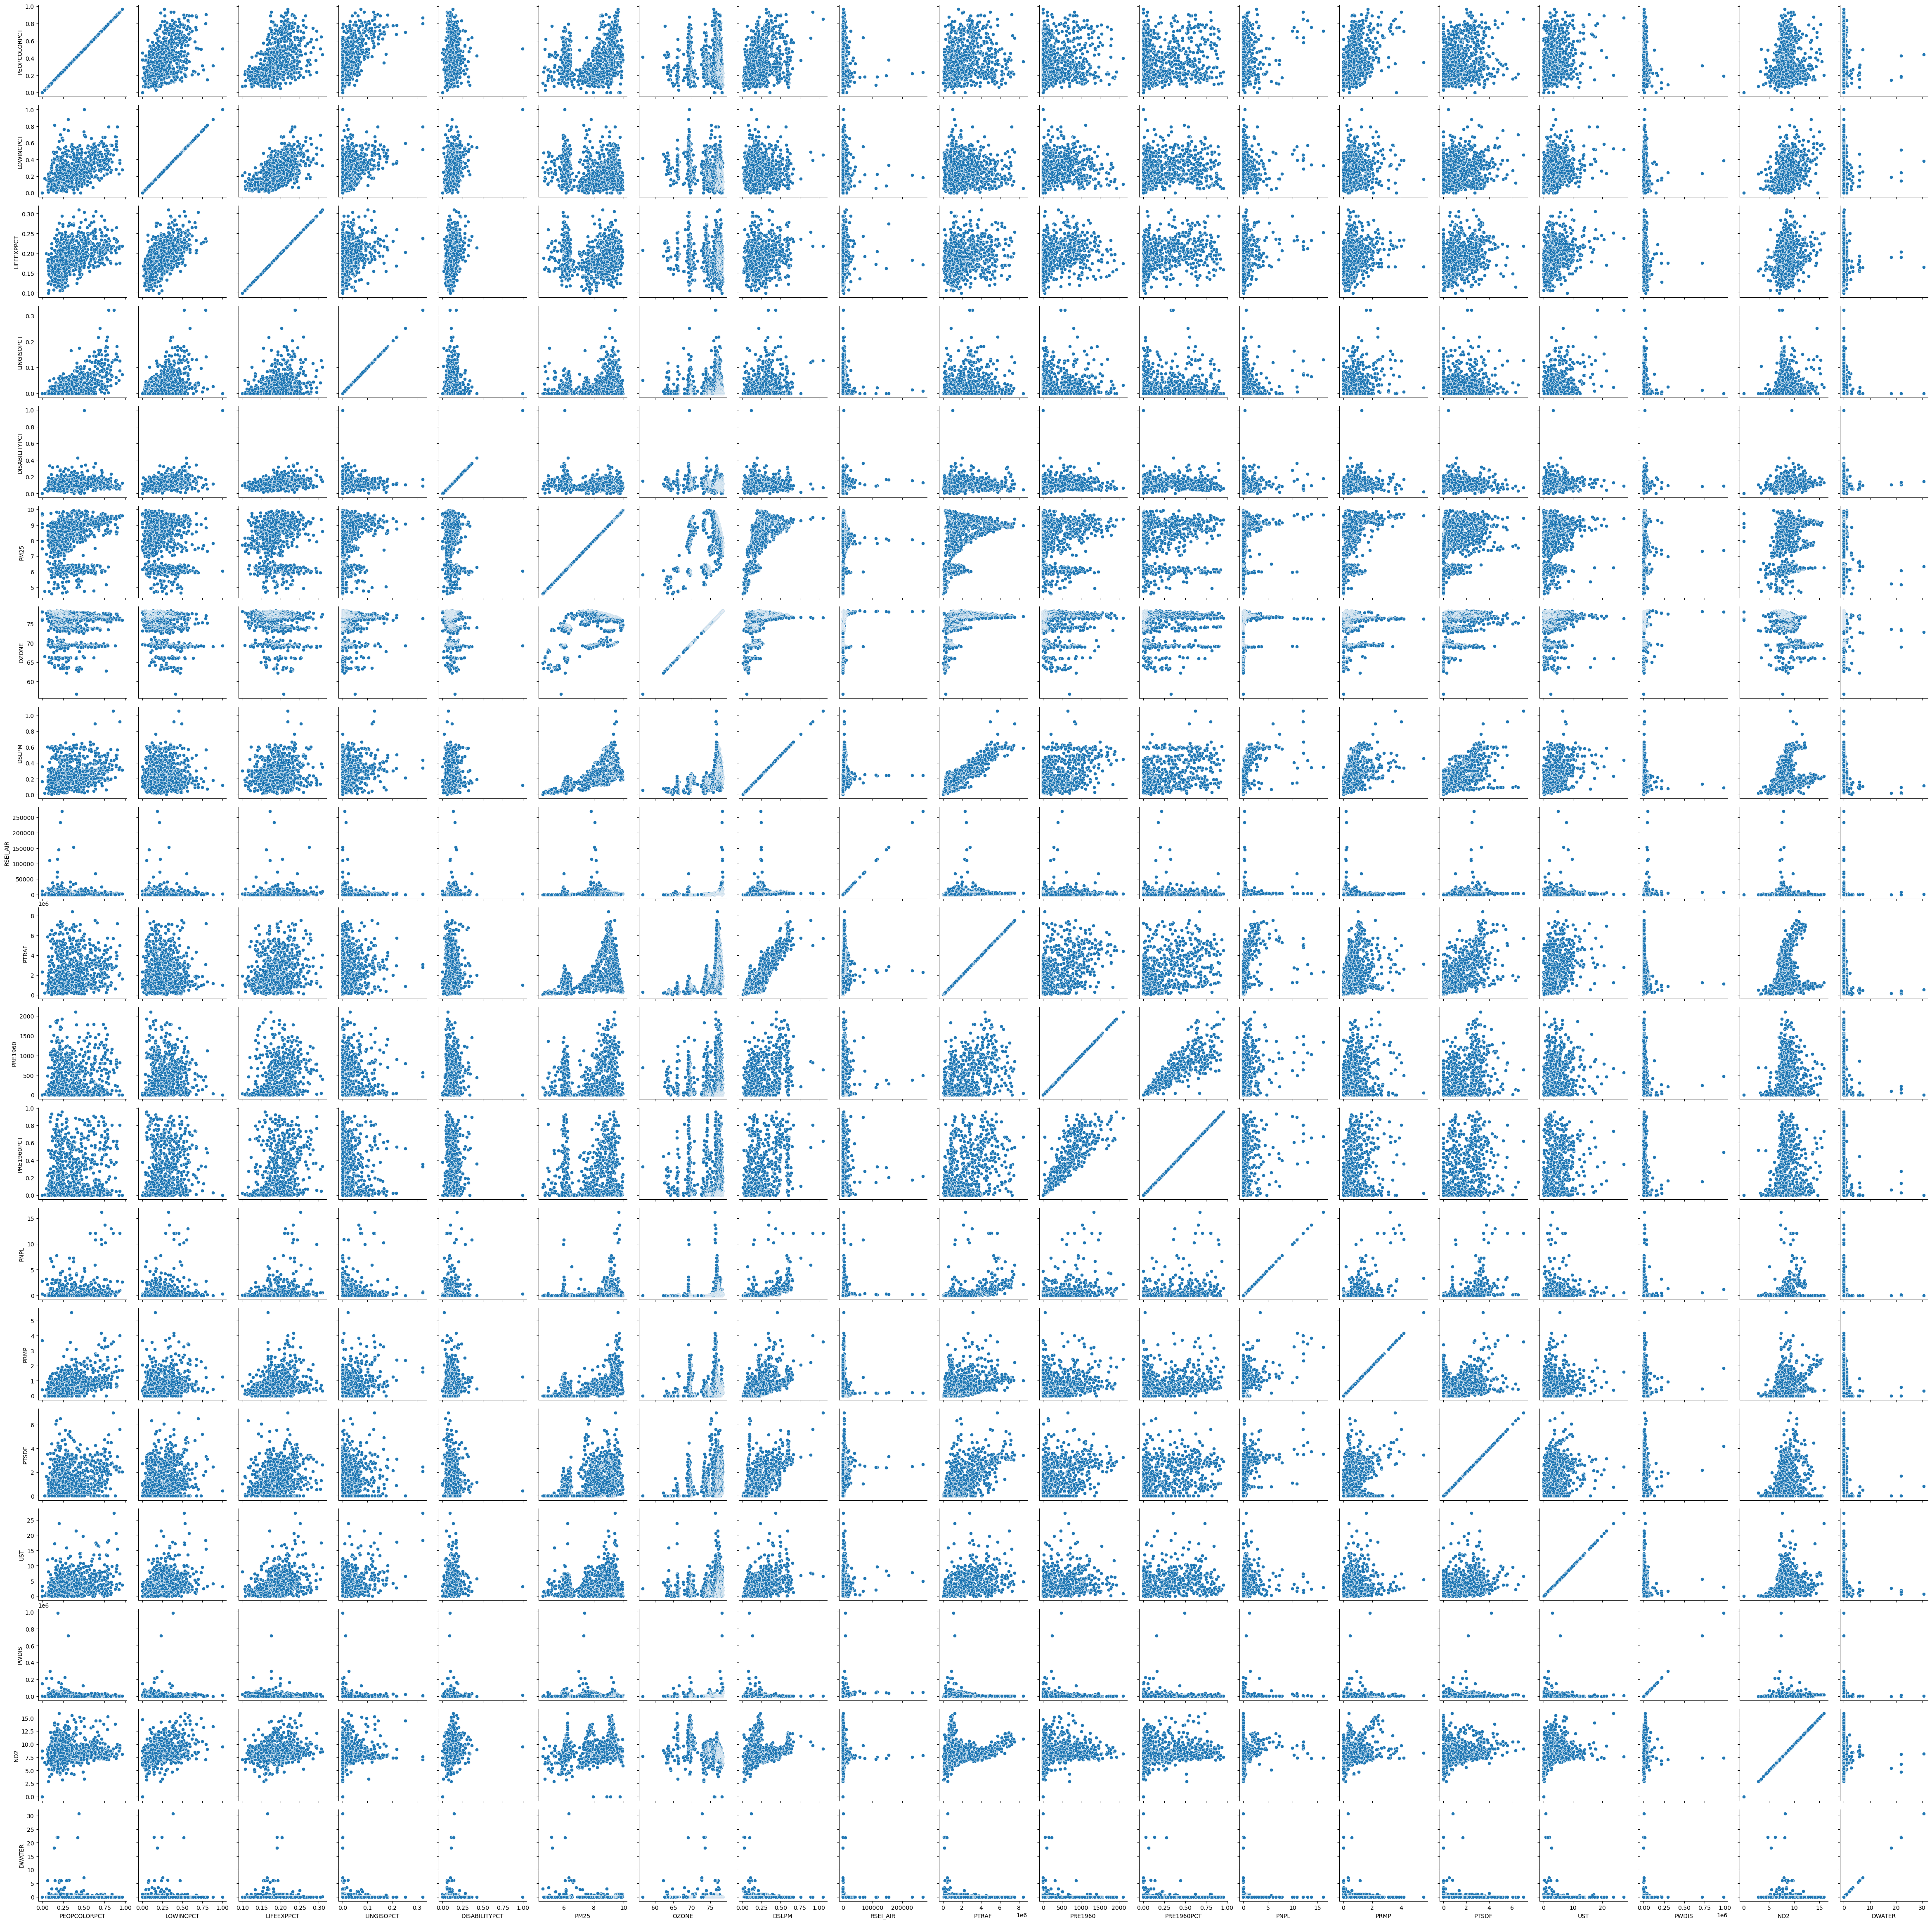

In [184]:
g = sns.PairGrid(ejUrban) #or sns.pairplot(ejUrban)
g.map(sns.scatterplot)

Okay, well, we have some unclear results... let's run a correlation:  
```python
ejdata.corr(numeric_only=True)
```

In [185]:
ejdata.corr(numeric_only=True)

PEOPCOLORPCT  LOWINCPCT  LIFEEXPPCT  LINGISOPCT  DISABILITYPCT  \
PEOPCOLORPCT       1.000000   0.513098    0.470926    0.615641       0.185730   
LOWINCPCT          0.513098   1.000000    0.547569    0.401665       0.480656   
LIFEEXPPCT         0.470926   0.547569    1.000000    0.300067       0.341197   
LINGISOPCT         0.615641   0.401665    0.300067    1.000000       0.040846   
DISABILITYPCT      0.185730   0.480656    0.341197    0.040846       1.000000   
PM25               0.289236  -0.136454    0.095128    0.218806      -0.193762   
OZONE              0.111651  -0.298828   -0.002337    0.057586      -0.235499   
DSLPM              0.344556   0.011263    0.248234    0.257970      -0.085096   
RSEI_AIR          -0.001848  -0.011815    0.069150   -0.029970       0.051848   
PTRAF              0.264043   0.062000    0.263584    0.220724      -0.032261   
PRE1960            0.148979   0.283148    0.332217    0.119965       0.176682   
PRE1960PCT         0.183422   0.345565    0.371474    0.121186       0.220600   
PNPL               0.196012   0.084482    0.194439    0.134801       0.036706   
PRMP               0.488370   0.201260    0.295898    0.320235       0.043298   
PTSDF              0.252331   0.152893    0.255930    0.163974      -0.066030   
UST                0.337754   0.324476    0.386097    0.386527       0.094810   
PWDIS             -0.053133   0.001464   -0.036149   -0.042129      -0.016352   
NO2                0.276331   0.232531    0.279007    0.166778       0.045553   
DWATER            -0.014238   0.010641   -0.035517   -0.020157       0.031652   

                   PM25     OZONE     DSLPM  RSEI_AIR     PTRAF   PRE1960  \
PEOPCOLORPCT   0.289236  0.111651  0.344556 -0.001848  0.264043  0.148979   
LOWINCPCT     -0.136454 -0.298828  0.011263 -0.011815  0.062000  0.283148   
LIFEEXPPCT     0.095128 -0.002337  0.248234  0.069150  0.263584  0.332217   
LINGISOPCT     0.218806  0.057586  0.257970 -0.029970  0.220724  0.119965   
DISABILITYPCT -0.193762 -0.235499 -0.085096  0.051848 -0.032261  0.176682   
PM25           1.000000  0.659994  0.737725  0.091823  0.547214  0.032497   
OZONE          0.659994  1.000000  0.616565  0.175756  0.591289 -0.029476   
DSLPM          0.737725  0.616565  1.000000  0.103453  0.907728  0.331186   
RSEI_AIR       0.091823  0.175756  0.103453  1.000000  0.132017  0.083771   
PTRAF          0.547214  0.591289  0.907728  0.132017  1.000000  0.405641   
PRE1960        0.032497 -0.029476  0.331186  0.083771  0.405641  1.000000   
PRE1960PCT    -0.022556 -0.092660  0.275949  0.081468  0.349043  0.905280   
PNPL           0.171700  0.155778  0.393211  0.059624  0.361688  0.322400   
PRMP           0.514393  0.245802  0.557634 -0.021502  0.431730  0.233661   
PTSDF          0.509472  0.457902  0.653968  0.218683  0.681706  0.363998   
UST            0.319250  0.283733  0.510720  0.136324  0.559869  0.337461   
PWDIS          0.002245  0.073285 -0.046036  0.109132 -0.050254 -0.035031   
NO2            0.442938  0.222540  0.460759  0.039593  0.383671  0.140414   
DWATER        -0.092850 -0.146583 -0.086181 -0.020797 -0.080241 -0.006913   

               PRE1960PCT      PNPL      PRMP     PTSDF       UST     PWDIS  \
PEOPCOLORPCT     0.183422  0.196012  0.488370  0.252331  0.337754 -0.053133   
LOWINCPCT        0.345565  0.084482  0.201260  0.152893  0.324476  0.001464   
LIFEEXPPCT       0.371474  0.194439  0.295898  0.255930  0.386097 -0.036149   
LINGISOPCT       0.121186  0.134801  0.320235  0.163974  0.386527 -0.042129   
DISABILITYPCT    0.220600  0.036706  0.043298 -0.066030  0.094810 -0.016352   
PM25            -0.022556  0.171700  0.514393  0.509472  0.319250  0.002245   
OZONE           -0.092660  0.155778  0.245802  0.457902  0.283733  0.073285   
DSLPM            0.275949  0.393211  0.557634  0.653968  0.510720 -0.046036   
RSEI_AIR         0.081468  0.059624 -0.021502  0.218683  0.136324  0.109132   
PTRAF            0.349043  0.361688  0.431730  0.681706  0.5598

Let's visualize that using [```sns.heatmap()```](https://seaborn.pydata.org/generated/seaborn.heatmap.html).  

Check the docs.

<Axes: >

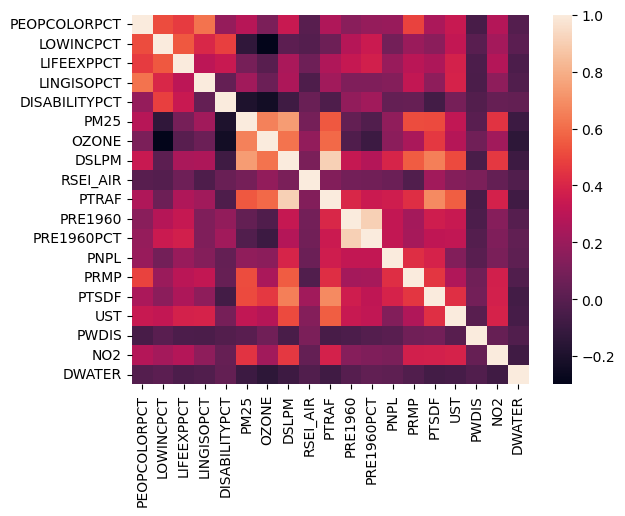

In [189]:
sns.heatmap(ejdata.corr(numeric_only=True))

Oh well, I tried! Let's get some different data!  

There is a built in dataset in Seaborn:
```python
iris = sns.load_dataset('iris')

In [5]:
iris = sns.load_dataset('iris')

Take a peek... 

In [66]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

```python
iris.shape
```

In [68]:
iris.shape

(150, 5)

```python
iris.columns
```

In [65]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Start with a basic scatterplot using petal length as the x axis and petal width on the y axis.  

Once you've got that, color the marker points by species.  

<Axes: xlabel='petal_length', ylabel='petal_width'>

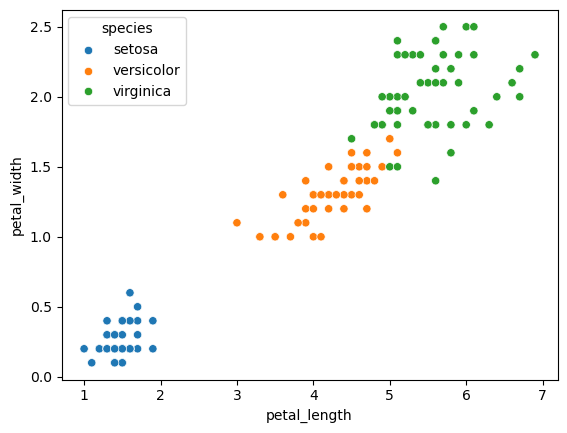

In [70]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species')

Try to make a [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)!

<Axes: >

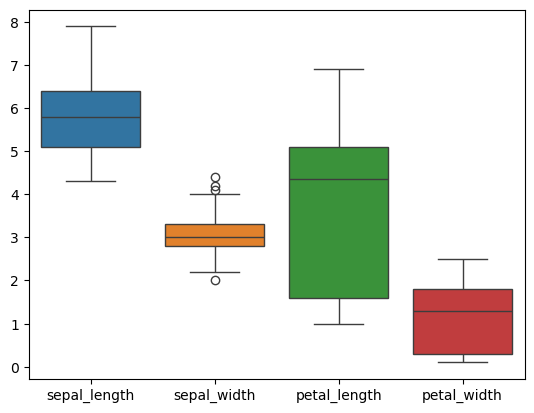

In [71]:
sns.boxplot(iris)

Make a [barplot](https://seaborn.pydata.org/generated/seaborn.barplot) that shows petal length by species! Make them different colors!

<Axes: xlabel='petal_length', ylabel='species'>

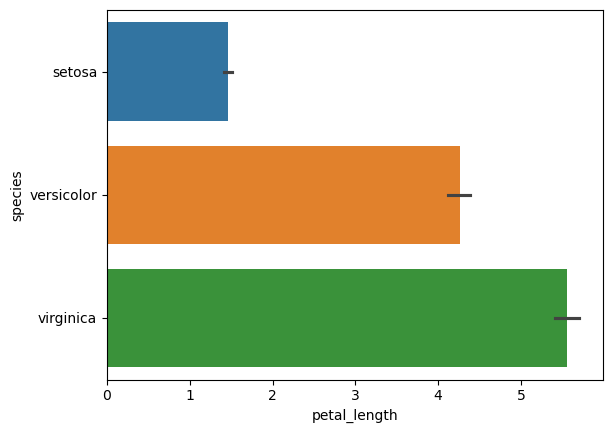

In [91]:
sns.barplot(data=iris, y='species', x = 'petal_length', hue='species')

Let's do some more advanced plotting. Say you want to make a figure for your paper... 

We'll combine charts using matplotlib.  Let's stack these three atop of one another...  

Start by reviewing the ```pyplot.subplots()``` documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html 

We'll start with this basic code then modify:
```python
fig, ax = plt.subplots()
```

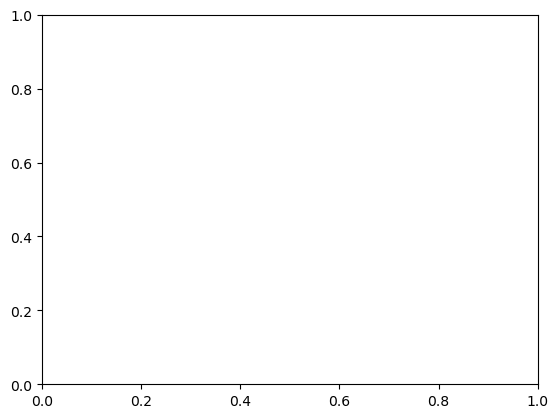

In [193]:
fig, ax = plt.subplots()

Okay, if we want these stacked vertically, we need to set the ```nrows``` parameter.  
How many rows do we need?

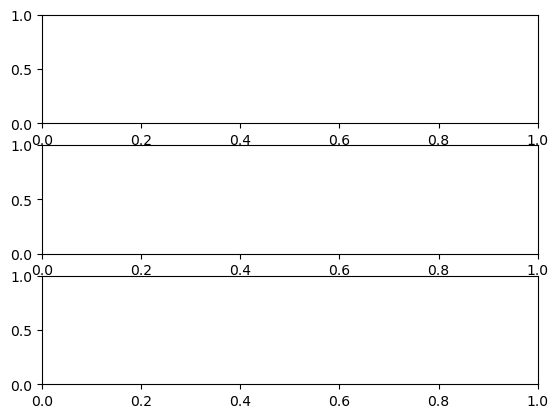

In [194]:
fig, ax = plt.subplots(nrows=3)

Okay, now we've got 3 empty charts. Let's start by populating the charts.  

Review the sns.barplot docs: https://seaborn.pydata.org/generated/seaborn.barplot 

What does the ax parameter do?  

What happens if we just run the our ```ax``` variable? 

In [195]:
ax

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

Okay, there's 3 things there... how do we select one of them?  

Okay, how can we use this info and apply it to the ```sns.barplot()``` ```ax``` parameter?

<Axes: xlabel='species', ylabel='petal_length'>

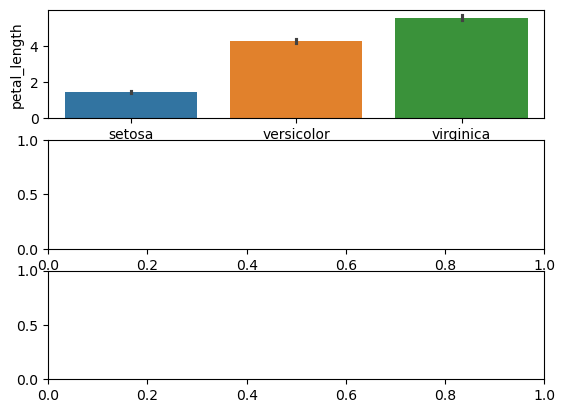

In [196]:
fig, ax = plt.subplots(nrows=3)
sns.barplot(data=iris, x='species', y='petal_length', hue='species', ax=ax[0])

Populate the remaining axes with the boxplot and scatterplot.

Make it pretty.

<Axes: >

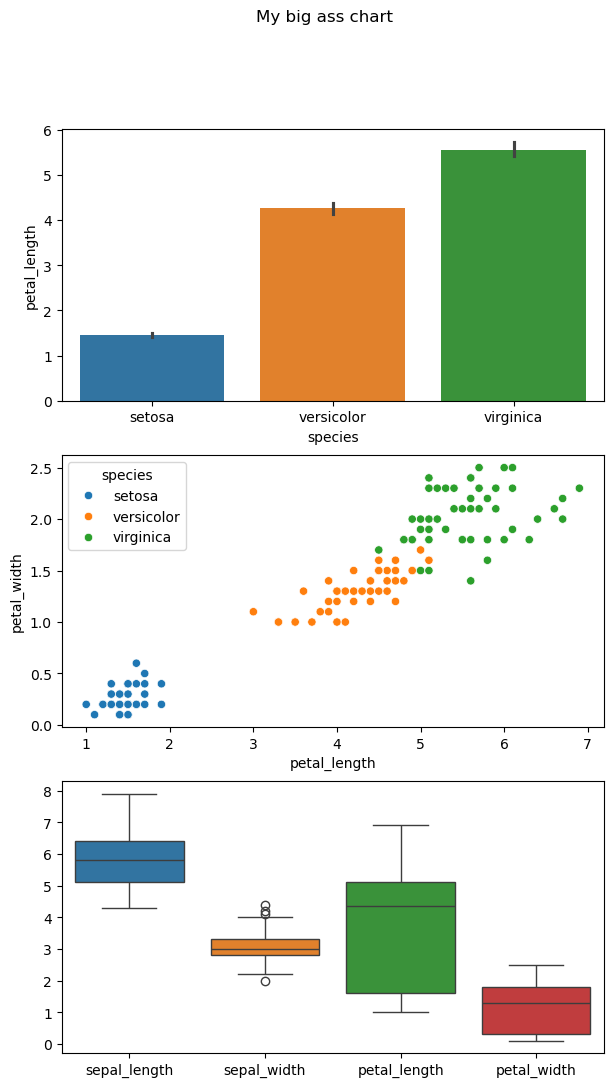

In [141]:
fig, ax = plt.subplots(nrows=3, figsize=(7,12))
fig.suptitle('My big ass chart')
sns.barplot(data=iris, x='species', y = 'petal_length', hue='species', ax=ax[0])
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species', ax=ax[1])
sns.boxplot(iris)